## Preprocessing

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [75]:
final_df = pd.read_csv('data/final_with_plot_summary.csv' )

In [76]:
final_df.columns

Index(['Unnamed: 0', 'Name', 'Year', 'Countries', 'Genres', 'Budget(USD)',
       'Domestic(USD)', 'Domestic_Percentage', 'Foreign(USD)',
       'Foreign_Percentage', 'Worldwide(USD)', 'Runtime(mins)', 'Rating',
       'Audience_Score', 'Critics_Score', 'plot_summary', 'release_date'],
      dtype='object')

In [77]:
## CLEAN THE PERCENTAGE COLUMNS
def percentage_to_float(x):
    return float(x.rstrip('%')) / 100 if isinstance(x, str) else x

final_df_cleaned = final_df.copy(deep = True)
columns_to_convert = ['Audience_Score', 'Critics_Score']
final_df_cleaned[columns_to_convert] = final_df[columns_to_convert].map(percentage_to_float)

In [78]:
final_df_cleaned = final_df_cleaned.dropna()
final_df_cleaned

,Unnamed: 0,Name,Year,Countries,Genres,Budget(USD),Domestic(USD),Domestic_Percentage,Foreign(USD),Foreign_Percentage,Worldwide(USD),Runtime(mins),Rating,Audience_Score,Critics_Score,plot_summary,release_date
0,0,10 cloverfield lane,2016,united states,"drama, horror, sci-fi, thriller",5000000,72082999,0.654010,38134000,0.345990,110216999,103,pg-13,0.79,0.91,"After surviving a car accident, Michelle (Mary...","Mar 11, 2016, Wide"
1,1,10 things i hate about you,1999,united states of america,"romantic comedy, romance film, coming of age, ...",13000000,38178166,0.713446,15334203,0.286554,53512369,97,pg-13,0.69,0.71,"Kat Stratford is beautiful, smart and quite ab...","Mar 31, 1999, Wide"
2,2,"10,000 bc",2008,"united states of america, south africa, new ze...","thriller, adventure, costume drama, action/adv...",105000000,94784201,0.351333,175000000,0.648667,269784201,109,pg-13,0.37,0.10,Mammoth hunter D'Leh (Steven Strait) has long ...,"Mar 7, 2008, Wide"
3,3,12 monkeys,1995,united states,"mystery, sci-fi, thriller",29000000,57141459,0.338437,111698000,0.661563,168839459,129,r,0.88,0.88,"Traveling back in time isn't simple, as James ...","Jan 26, 1995, Wide"
4,4,12 rounds,2009,united states of america,"action thrillers, thriller, action, crime fiction",20000000,12234694,0.708013,5045632,0.291987,17280326,108,pg-13,0.45,0.31,When New Orleans cop Danny Fisher (John Cena) ...,"Mar 27, 2009, Wide"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,3861,zoolander,2001,"united states of america, australia, germany","parody, comedy of errors, comedy",28000000,45172250,0.743197,15608731,0.256803,60780981,90,pg-13,0.80,0.64,Propelled to the top of the fashion world by a...,"Sep 28, 2001, Wide"
3862,3862,zoolander 2,2016,united states,"action, adventure, comedy, mystery, romance",50000000,28848693,0.508592,27874000,0.491408,56722693,101,pg-13,0.20,0.22,Former models Derek Zoolander (Ben Stiller) an...,"Feb 12, 2016, Wide"
3863,3863,zoom,2006,united states of america,"science fiction, action, fantasy, adventure",35000000,11989328,0.958658,517034,0.041342,12506362,93,pg,0.34,0.05,"Capt. Zoom, or Jack (Tim Allen), as he is now ...","Aug 11, 2006, Wide"
3864,3864,zootopia,2016,united states,"action, adventure, animation, comedy, crime, f...",150000000,341268248,0.333340,682515947,0.666660,1023784195,108,pg,0.92,0.98,From the largest elephant to the smallest shre...,"Mar 4, 2016, Wide"


In [79]:
final_df_cleaned.isna().any()

Unnamed: 0             False
Name                   False
Year                   False
Countries              False
Genres                 False
Budget(USD)            False
Domestic(USD)          False
Domestic_Percentage    False
Foreign(USD)           False
Foreign_Percentage     False
Worldwide(USD)         False
Runtime(mins)          False
Rating                 False
Audience_Score         False
Critics_Score          False
plot_summary           False
release_date           False
dtype: bool

### Filter countries..

In [80]:
# Split countries into lists and explode
df_exploded = final_df_cleaned.copy(deep=True)
df_exploded['Countries'] = final_df_cleaned['Countries'].str.split(',')
df_exploded = df_exploded.explode('Countries')
df_exploded['Countries'] = df_exploded['Countries'].str.strip()
df_exploded['Countries'] = df_exploded['Countries'].replace('united states', 'united states of america')

country_counts = df_exploded['Countries'].value_counts()
country_counts.head(30)


Countries
united states of america    3504
united kingdom               498
germany                      257
france                       225
canada                       177
australia                    126
japan                         46
spain                         46
italy                         43
china                         32
new zealand                   31
ireland                       29
hong kong                     21
netherlands                   20
sweden                        17
belgium                       17
india                         16
mexico                        15
denmark                       15
czech republic                14
south africa                  11
brazil                        11
hungary                       10
switzerland                    8
united arab emirates           8
luxembourg                     8
norway                         7
finland                        7
england                        7
romania                        6


In [81]:
USA_df = df_exploded[df_exploded['Countries'].str.contains(r'\b(united states|united states of america|america)\b', case=False, na=False)]
len(USA_df)


C:\Users\ameer\AppData\Local\Temp\ipykernel_28140\1644501492.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  USA_df = df_exploded[df_exploded['Countries'].str.contains(r'\b(united states|united states of america|america)\b', case=False, na=False)]


3506

In [82]:
# Display filtere
USA_df

,Unnamed: 0,Name,Year,Countries,Genres,Budget(USD),Domestic(USD),Domestic_Percentage,Foreign(USD),Foreign_Percentage,Worldwide(USD),Runtime(mins),Rating,Audience_Score,Critics_Score,plot_summary,release_date
0,0,10 cloverfield lane,2016,united states of america,"drama, horror, sci-fi, thriller",5000000,72082999,0.654010,38134000,0.345990,110216999,103,pg-13,0.79,0.91,"After surviving a car accident, Michelle (Mary...","Mar 11, 2016, Wide"
1,1,10 things i hate about you,1999,united states of america,"romantic comedy, romance film, coming of age, ...",13000000,38178166,0.713446,15334203,0.286554,53512369,97,pg-13,0.69,0.71,"Kat Stratford is beautiful, smart and quite ab...","Mar 31, 1999, Wide"
2,2,"10,000 bc",2008,united states of america,"thriller, adventure, costume drama, action/adv...",105000000,94784201,0.351333,175000000,0.648667,269784201,109,pg-13,0.37,0.10,Mammoth hunter D'Leh (Steven Strait) has long ...,"Mar 7, 2008, Wide"
3,3,12 monkeys,1995,united states of america,"mystery, sci-fi, thriller",29000000,57141459,0.338437,111698000,0.661563,168839459,129,r,0.88,0.88,"Traveling back in time isn't simple, as James ...","Jan 26, 1995, Wide"
4,4,12 rounds,2009,united states of america,"action thrillers, thriller, action, crime fiction",20000000,12234694,0.708013,5045632,0.291987,17280326,108,pg-13,0.45,0.31,When New Orleans cop Danny Fisher (John Cena) ...,"Mar 27, 2009, Wide"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,3861,zoolander,2001,united states of america,"parody, comedy of errors, comedy",28000000,45172250,0.743197,15608731,0.256803,60780981,90,pg-13,0.80,0.64,Propelled to the top of the fashion world by a...,"Sep 28, 2001, Wide"
3862,3862,zoolander 2,2016,united states of america,"action, adventure, comedy, mystery, romance",50000000,28848693,0.508592,27874000,0.491408,56722693,101,pg-13,0.20,0.22,Former models Derek Zoolander (Ben Stiller) an...,"Feb 12, 2016, Wide"
3863,3863,zoom,2006,united states of america,"science fiction, action, fantasy, adventure",35000000,11989328,0.958658,517034,0.041342,12506362,93,pg,0.34,0.05,"Capt. Zoom, or Jack (Tim Allen), as he is now ...","Aug 11, 2006, Wide"
3864,3864,zootopia,2016,united states of america,"action, adventure, animation, comedy, crime, f...",150000000,341268248,0.333340,682515947,0.666660,1023784195,108,pg,0.92,0.98,From the largest elephant to the smallest shre...,"Mar 4, 2016, Wide"


### Distribution of Years
FILTER THE YEARS WITH FEW MOVIES

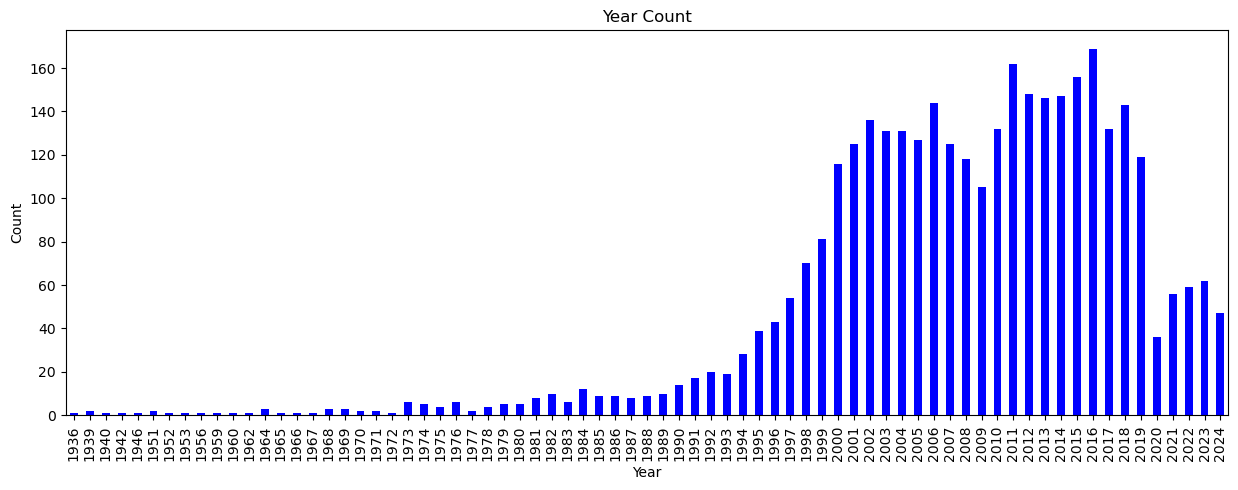

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_years contains the year data
df_copy = USA_df.copy(deep=True)
df_years = df_copy['Year'].dropna()
years_count = df_years.explode().value_counts()
years_count = years_count.sort_index(ascending=True)
years_count.plot(kind='bar', color='blue', figsize=(15, 5))

plt.title('Year Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


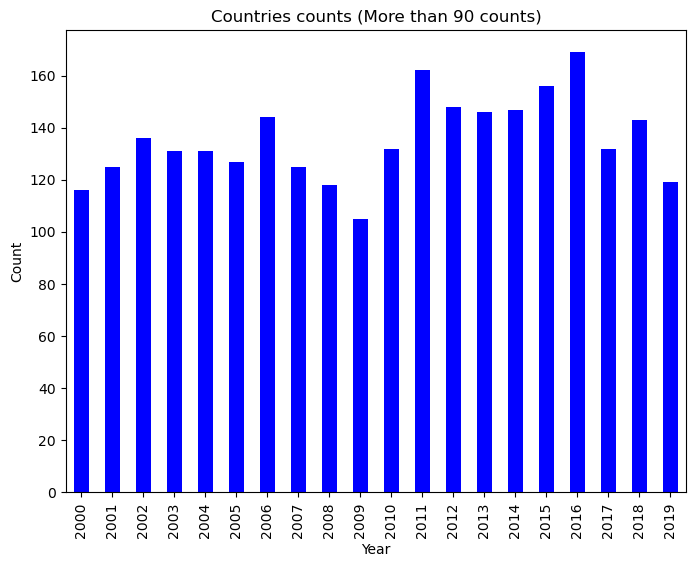

In [84]:
## with filtering ..
count_threshold = 90
df_years_count = years_count[years_count > count_threshold]
plt.figure(figsize=(8, 6))
df_years_count.plot(kind='bar', color='blue')
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

We can see that the period between 2000-2010 has the most amount of movies released. We should take this into consideration when doing our Time Series analysis.

In [85]:
USA_df_cleaned = USA_df[USA_df['Year'].isin(df_years_count.index)]

In [86]:
USA_df_cleaned.Year.value_counts()

Year
2016    169
2011    162
2015    156
2012    148
2014    147
2013    146
2006    144
2018    143
2002    136
2017    132
2010    132
2004    131
2003    131
2005    127
2007    125
2001    125
2019    119
2008    118
2000    116
2009    105
Name: count, dtype: int64

### Consider Inflation..

In [87]:
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
             2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 
             2020, 2021, 2022, 2023],
    'Inflation_Rate': [3.40, 1.60, 2.40, 1.90, 3.30, 3.40, 2.50, 4.10, 0.10, 2.70,
                       1.50, 3.00, 1.70, 1.50, 0.80, 0.70, 2.10, 2.10, 1.90, 2.30,
                       1.40, 7.00, 6.50, 3.40],

}
inflation_df = pd.DataFrame(data)
inflation_df['Cumulative_Inflation'] = (1 + inflation_df['Inflation_Rate'] / 100).cumprod() - 1
inflation_df['Cumulative_Inflation'] = inflation_df['Cumulative_Inflation'] - inflation_df['Cumulative_Inflation'].iloc[0]
inflation_df.head(5)


,Year,Inflation_Rate,Cumulative_Inflation
0,2000,3.4,0.000000
1,2001,1.6,0.016544
2,2002,2.4,0.041757
3,2003,1.9,0.062196
4,2004,3.3,0.098371


In [88]:
## consider my dataset with inflation:.. 
final_inflated = USA_df_cleaned.copy(deep = True)
final_inflated['Cumulative_Inflation'] = USA_df_cleaned['Year'].apply(lambda x: inflation_df['Cumulative_Inflation'].iloc[2023- x])
## apply inflation: 
final_inflated['Worldwide(USD)'] = final_inflated['Worldwide(USD)'] * (1 + final_inflated['Cumulative_Inflation'])
final_inflated['Domestic(USD)'] = final_inflated['Domestic(USD)'] * (1 + final_inflated['Cumulative_Inflation'])
final_inflated['Foreign(USD)'] = final_inflated['Foreign(USD)'] * (1 + final_inflated['Cumulative_Inflation'])
final_inflated['Budget(USD)'] = final_inflated['Budget(USD)'] * (1 + final_inflated['Cumulative_Inflation'])
final_inflated['Domestic_Percentage'] = final_inflated['Domestic(USD)'] / final_inflated['Worldwide(USD)']
final_inflated['Foreign_Percentage'] = final_inflated['Foreign(USD)'] / final_inflated['Worldwide(USD)']

final_inflated.rename(columns = {'Worldwide(USD)': 'Worldwide(USD)_Inflated', 'Domestic(USD)': 'Domestic(USD)_Inflated', 'Foreign(USD)': 'Foreign(USD)_Inflated', 'Budget(USD)': 'Budget(USD)_Inflated'}, inplace = True)

In [89]:
final_inflated

,Unnamed: 0,Name,Year,Countries,Genres,Budget(USD)_Inflated,Domestic(USD)_Inflated,Domestic_Percentage,Foreign(USD)_Inflated,Foreign_Percentage,Worldwide(USD)_Inflated,Runtime(mins),Rating,Audience_Score,Critics_Score,plot_summary,release_date,Cumulative_Inflation
0,0,10 cloverfield lane,2016,united states of america,"drama, horror, sci-fi, thriller",6.076746e+06,8.760602e+07,0.654010,4.634613e+07,0.345990,1.339521e+08,103,pg-13,0.79,0.91,"After surviving a car accident, Michelle (Mary...","Mar 11, 2016, Wide",0.215349
2,2,"10,000 bc",2008,united states of america,"thriller, adventure, costume drama, action/adv...",1.441563e+08,1.301309e+08,0.351333,2.402606e+08,0.648667,3.703914e+08,109,pg-13,0.37,0.10,Mammoth hunter D'Leh (Steven Strait) has long ...,"Mar 7, 2008, Wide",0.372917
4,4,12 rounds,2009,united states of america,"action thrillers, thriller, action, crime fiction",2.726275e+07,1.667757e+07,0.708013,6.877890e+06,0.291987,2.355546e+07,108,pg-13,0.45,0.31,When New Orleans cop Danny Fisher (John Cena) ...,"Mar 27, 2009, Wide",0.363138
5,5,12 strong,2018,united states of america,"action, drama, history, war",3.979050e+07,5.209113e+07,0.644274,2.876133e+07,0.355726,8.085246e+07,130,r,0.62,0.50,"In the wake of Sept. 11, Capt. Mitch Nelson le...","Jan 19, 2018, Wide",0.136872
6,6,12 years a slave,2013,united states of america,"biography, drama, history",2.539260e+07,7.195247e+07,0.301875,1.663993e+08,0.698125,2.383517e+08,134,r,0.90,0.95,"In the years before the Civil War, Solomon Nor...","Oct 18, 2013, Limited",0.269630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,3861,zoolander,2001,united states of america,"parody, comedy of errors, comedy",4.851315e+07,7.826600e+07,0.743197,2.704388e+07,0.256803,1.053099e+08,90,pg-13,0.80,0.64,Propelled to the top of the fashion world by a...,"Sep 28, 2001, Wide",0.732612
3862,3862,zoolander 2,2016,united states of america,"action, adventure, comedy, mystery, romance",6.076746e+07,3.506124e+07,0.508592,3.387664e+07,0.491408,6.893788e+07,101,pg-13,0.20,0.22,Former models Derek Zoolander (Ben Stiller) an...,"Feb 12, 2016, Wide",0.215349
3863,3863,zoom,2006,united states of america,"science fiction, action, fantasy, adventure",5.014200e+07,1.717625e+07,0.958658,7.407176e+05,0.041342,1.791697e+07,93,pg,0.34,0.05,"Capt. Zoom, or Jack (Tim Allen), as he is now ...","Aug 11, 2006, Wide",0.432628
3864,3864,zootopia,2016,united states of america,"action, adventure, animation, comedy, crime, f...",1.823024e+08,4.147601e+08,0.333340,8.294952e+08,0.666660,1.244255e+09,108,pg,0.92,0.98,From the largest elephant to the smallest shre...,"Mar 4, 2016, Wide",0.215349


In [90]:
final_inflated['Countries'].value_counts()

Countries
united states of america        2710
united kingdom united states       1
united states germany              1
Name: count, dtype: int64

In [91]:
final_inflated.drop(columns = ['Cumulative_Inflation'], inplace = True)

### Plot summary cleaning

In [92]:
# Removing trailing spaces
final_inflated['plot_summary'] = final_inflated['plot_summary'].str.strip()

### Release date cleaning

In [93]:
# Droping the Year columns to use the year mentioned in the release date column
final_inflated = final_inflated.drop(columns=["Year"])

In [94]:
# Noticed some release dates weren't properly scraped
problematic_rows = final_inflated[final_inflated["release_date"].str.contains(r'\(Sexual')]
final_inflated = final_inflated.drop(problematic_rows.index)

In [95]:
final_inflated

,Unnamed: 0,Name,Countries,Genres,Budget(USD)_Inflated,Domestic(USD)_Inflated,Domestic_Percentage,Foreign(USD)_Inflated,Foreign_Percentage,Worldwide(USD)_Inflated,Runtime(mins),Rating,Audience_Score,Critics_Score,plot_summary,release_date
0,0,10 cloverfield lane,united states of america,"drama, horror, sci-fi, thriller",6.076746e+06,8.760602e+07,0.654010,4.634613e+07,0.345990,1.339521e+08,103,pg-13,0.79,0.91,"After surviving a car accident, Michelle (Mary...","Mar 11, 2016, Wide"
2,2,"10,000 bc",united states of america,"thriller, adventure, costume drama, action/adv...",1.441563e+08,1.301309e+08,0.351333,2.402606e+08,0.648667,3.703914e+08,109,pg-13,0.37,0.10,Mammoth hunter D'Leh (Steven Strait) has long ...,"Mar 7, 2008, Wide"
4,4,12 rounds,united states of america,"action thrillers, thriller, action, crime fiction",2.726275e+07,1.667757e+07,0.708013,6.877890e+06,0.291987,2.355546e+07,108,pg-13,0.45,0.31,When New Orleans cop Danny Fisher (John Cena) ...,"Mar 27, 2009, Wide"
5,5,12 strong,united states of america,"action, drama, history, war",3.979050e+07,5.209113e+07,0.644274,2.876133e+07,0.355726,8.085246e+07,130,r,0.62,0.50,"In the wake of Sept. 11, Capt. Mitch Nelson le...","Jan 19, 2018, Wide"
6,6,12 years a slave,united states of america,"biography, drama, history",2.539260e+07,7.195247e+07,0.301875,1.663993e+08,0.698125,2.383517e+08,134,r,0.90,0.95,"In the years before the Civil War, Solomon Nor...","Oct 18, 2013, Limited"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,3861,zoolander,united states of america,"parody, comedy of errors, comedy",4.851315e+07,7.826600e+07,0.743197,2.704388e+07,0.256803,1.053099e+08,90,pg-13,0.80,0.64,Propelled to the top of the fashion world by a...,"Sep 28, 2001, Wide"
3862,3862,zoolander 2,united states of america,"action, adventure, comedy, mystery, romance",6.076746e+07,3.506124e+07,0.508592,3.387664e+07,0.491408,6.893788e+07,101,pg-13,0.20,0.22,Former models Derek Zoolander (Ben Stiller) an...,"Feb 12, 2016, Wide"
3863,3863,zoom,united states of america,"science fiction, action, fantasy, adventure",5.014200e+07,1.717625e+07,0.958658,7.407176e+05,0.041342,1.791697e+07,93,pg,0.34,0.05,"Capt. Zoom, or Jack (Tim Allen), as he is now ...","Aug 11, 2006, Wide"
3864,3864,zootopia,united states of america,"action, adventure, animation, comedy, crime, f...",1.823024e+08,4.147601e+08,0.333340,8.294952e+08,0.666660,1.244255e+09,108,pg,0.92,0.98,From the largest elephant to the smallest shre...,"Mar 4, 2016, Wide"


In [96]:
# Cleaning the release date
final_inflated["release_date"] = final_inflated["release_date"].str.replace(r"Wide|Limited", "", regex=True).str.strip()

#Splitting the cleaned release_date into "Day", "Month", and "Year"

release_date_split = final_inflated["release_date"].str.split(" ", expand=True)
final_inflated["Month"] = release_date_split[0].str.replace(",", "").astype(str)
final_inflated["Day"] = release_date_split[1].str.replace(",", "").astype(int) 
final_inflated["Year"] = release_date_split[2].str.replace(",", "").astype(int)
final_inflated = final_inflated.drop(columns= "release_date")

In [97]:
final_inflated

,Unnamed: 0,Name,Countries,Genres,Budget(USD)_Inflated,Domestic(USD)_Inflated,Domestic_Percentage,Foreign(USD)_Inflated,Foreign_Percentage,Worldwide(USD)_Inflated,Runtime(mins),Rating,Audience_Score,Critics_Score,plot_summary,Month,Day,Year
0,0,10 cloverfield lane,united states of america,"drama, horror, sci-fi, thriller",6.076746e+06,8.760602e+07,0.654010,4.634613e+07,0.345990,1.339521e+08,103,pg-13,0.79,0.91,"After surviving a car accident, Michelle (Mary...",Mar,11,2016
2,2,"10,000 bc",united states of america,"thriller, adventure, costume drama, action/adv...",1.441563e+08,1.301309e+08,0.351333,2.402606e+08,0.648667,3.703914e+08,109,pg-13,0.37,0.10,Mammoth hunter D'Leh (Steven Strait) has long ...,Mar,7,2008
4,4,12 rounds,united states of america,"action thrillers, thriller, action, crime fiction",2.726275e+07,1.667757e+07,0.708013,6.877890e+06,0.291987,2.355546e+07,108,pg-13,0.45,0.31,When New Orleans cop Danny Fisher (John Cena) ...,Mar,27,2009
5,5,12 strong,united states of america,"action, drama, history, war",3.979050e+07,5.209113e+07,0.644274,2.876133e+07,0.355726,8.085246e+07,130,r,0.62,0.50,"In the wake of Sept. 11, Capt. Mitch Nelson le...",Jan,19,2018
6,6,12 years a slave,united states of america,"biography, drama, history",2.539260e+07,7.195247e+07,0.301875,1.663993e+08,0.698125,2.383517e+08,134,r,0.90,0.95,"In the years before the Civil War, Solomon Nor...",Oct,18,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,3861,zoolander,united states of america,"parody, comedy of errors, comedy",4.851315e+07,7.826600e+07,0.743197,2.704388e+07,0.256803,1.053099e+08,90,pg-13,0.80,0.64,Propelled to the top of the fashion world by a...,Sep,28,2001
3862,3862,zoolander 2,united states of america,"action, adventure, comedy, mystery, romance",6.076746e+07,3.506124e+07,0.508592,3.387664e+07,0.491408,6.893788e+07,101,pg-13,0.20,0.22,Former models Derek Zoolander (Ben Stiller) an...,Feb,12,2016
3863,3863,zoom,united states of america,"science fiction, action, fantasy, adventure",5.014200e+07,1.717625e+07,0.958658,7.407176e+05,0.041342,1.791697e+07,93,pg,0.34,0.05,"Capt. Zoom, or Jack (Tim Allen), as he is now ...",Aug,11,2006
3864,3864,zootopia,united states of america,"action, adventure, animation, comedy, crime, f...",1.823024e+08,4.147601e+08,0.333340,8.294952e+08,0.666660,1.244255e+09,108,pg,0.92,0.98,From the largest elephant to the smallest shre...,Mar,4,2016


In [98]:
final_inflated.to_csv('data/final_plot_release_cleaned.csv', index=False)